<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Prediction of Mohs Hardness</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
7. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
    - <a href="#grid_search_cv" style="text-decoration: None">Grid Search CV</a>
    - <a href="#randomized_search_cv" style="text-decoration: None">Randomized Search CV</a>
    - <a href="#bayes_optimization" style="text-decoration: None">Bayesian Optimization with Gaussian Process</a>
8. <a href="#performance_summary" style="text-decoration: None">Performance Comparison and Summary</a>
9. <a href="#pred_single_input" style="text-decoration: None">Make Prediction on a single Input</a>
10. <a href="#save_model" style="text-decoration: None">Save Model</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore")

In [2]:
class conf:
    index = 'id'
    target = 'Hardness'
    random = 42
    folds = 8

np.random.seed(conf.random)

In [3]:
try:
    train_df = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
    test_df = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')
    submission_df = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')
    original_df = pd.read_csv('/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv')
except:
    train_df = pd.read_csv('/playground-series-s3e25/train.csv')
    test_df = pd.read_csv('/playground-series-s3e25/test.csv')
    submission_df = pd.read_csv('/playground-series-s3e25/sample_submission.csv')
    original_df = pd.read_csv('prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [4]:
original_df.head()

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.30,110.00,23.00,36.67,2.67,82.60,8.50,2.15,2.01,1.25,0.46,7.67
1,1,5.50,406.00,30.47,9.90,4.68,19.81,11.46,2.70,1.68,0.87,0.52,0.74
2,2,5.50,406.00,30.47,10.41,4.92,20.93,11.54,2.75,1.70,0.89,0.50,0.78
3,3,5.50,476.00,61.14,11.61,4.68,23.66,11.49,2.76,1.71,0.85,0.52,1.49
4,4,5.50,476.00,61.14,12.21,4.92,24.98,11.57,2.82,1.74,0.87,0.49,1.57


In [5]:
train_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.00,0.84,10.00,4.80,20.61,11.09,2.77,1.73,0.86,0.50,0.91,6.00
1,1,100.00,7.56,10.00,4.80,20.30,12.04,2.75,1.63,0.91,0.49,0.72,6.50
2,2,76.00,8.89,15.60,5.60,33.74,12.09,2.83,1.79,0.86,0.48,1.51,2.50
3,3,100.00,8.80,10.00,4.80,20.21,10.95,2.65,1.63,0.94,0.49,0.79,6.00
4,4,116.00,9.58,11.60,4.80,24.99,11.82,2.77,1.68,0.90,0.49,1.86,6.00


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             622 non-null    int64  
 1   Hardness               622 non-null    float64
 2   allelectrons_Total     622 non-null    float64
 3   density_Total          622 non-null    float64
 4   allelectrons_Average   622 non-null    float64
 5   val_e_Average          622 non-null    float64
 6   atomicweight_Average   622 non-null    float64
 7   ionenergy_Average      622 non-null    float64
 8   el_neg_chi_Average     622 non-null    float64
 9   R_vdw_element_Average  622 non-null    float64
 10  R_cov_element_Average  622 non-null    float64
 11  zaratio_Average        622 non-null    float64
 12  density_Average        622 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 63.3 KB


In [8]:
original_df['Hardness'].unique()

array([ 2.3,  5.5,  6. ,  3.8,  6.3,  5.8,  3.5,  6.8,  3. ,  1.5,  1.8,
        7.5,  3.3,  2.8,  5. ,  4.8,  6.5,  7.8,  2. ,  7.3,  2.5, 10. ,
        4.5,  8.5,  7. ,  9. ,  5.3,  4.3,  4. ,  3.2,  9.5,  1.3,  6.2,
        1. ,  8. ,  2.9,  3.6])

In [9]:
train_df.Hardness.unique()

array([ 6.  ,  6.5 ,  2.5 ,  2.  ,  4.  ,  5.8 ,  5.5 ,  3.5 ,  4.5 ,
        3.8 ,  3.3 ,  5.  ,  6.3 ,  2.8 ,  3.  ,  1.8 ,  2.3 ,  7.  ,
        7.3 ,  7.5 , 10.  ,  5.3 ,  8.5 ,  4.3 ,  4.8 ,  6.8 ,  7.8 ,
        1.5 ,  1.3 ,  9.  ,  2.9 ,  8.  ,  6.2 ,  5.75,  9.5 ,  2.1 ,
        9.8 ,  8.1 ,  6.4 ,  4.7 ,  1.  ,  4.1 ,  3.2 ,  2.2 ,  8.3 ,
        3.6 ,  2.6 ,  6.7 ,  5.4 ,  6.64])

In [10]:
train_df.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00,10407.00
mean,5203.00,128.05,14.49,17.03,4.55,37.51,10.94,2.61,1.73,0.94,0.49,2.13,4.65
std,3004.39,224.12,15.97,10.47,0.69,26.01,1.41,0.33,0.19,0.18,0.06,1.94,1.68
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2601.50,68.00,7.56,10.00,4.00,20.30,10.59,2.53,1.67,0.86,0.48,0.81,3.00
50%,5203.00,100.00,10.65,12.60,4.71,26.20,11.20,2.71,1.73,0.92,0.49,1.35,5.50
75%,7804.50,131.00,16.68,22.00,4.80,48.72,11.67,2.81,1.80,0.98,0.50,2.74,6.00
max,10406.00,15300.00,643.09,67.00,6.00,167.40,15.25,3.44,2.25,1.62,0.83,10.97,10.00


In [11]:
original_df.describe()

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00,622.00
mean,315.18,4.61,312.90,27.86,14.81,4.42,32.24,11.11,2.63,1.67,0.88,0.51,1.93
std,182.09,1.73,853.33,39.24,9.96,0.81,24.59,1.75,0.40,0.26,0.20,0.10,1.94
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,157.25,3.00,98.25,10.56,9.37,4.06,18.83,10.96,2.63,1.61,0.80,0.48,0.74
50%,315.50,5.50,186.50,20.74,10.85,4.64,22.20,11.36,2.71,1.71,0.89,0.50,1.03
75%,472.75,5.95,390.00,34.82,17.42,4.80,38.85,11.80,2.77,1.76,0.95,0.54,2.34
max,630.00,10.00,15300.00,643.09,67.00,6.00,167.40,14.16,3.43,2.25,1.50,0.77,10.97


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id=""></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Drop ID columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [12]:
original_df = original_df.drop(columns=['Unnamed: 0'], axis=1)
train_df = train_df.drop(columns=['id'], axis=1)
test_df = test_df.drop(columns=['id'], axis=1)

<a id=""></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Merge Data</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [13]:
assert sorted(original_df.columns) == sorted(train_df.columns)

In [14]:
combined_train_df = pd.concat([train_df, original_df], axis=0)
combined_train_df = combined_train_df.drop_duplicates()
combined_train_df = combined_train_df.reset_index(drop=True)

In [15]:
combined_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,11006.00,138.47,300.60,0.00,68.00,100.00,138.00,15300.00
density_Total,11006.00,15.25,18.36,0.00,7.56,11.07,17.59,643.09
allelectrons_Average,11006.00,16.92,10.45,0.00,10.00,12.50,21.83,67.00
val_e_Average,11006.00,4.54,0.69,0.00,4.00,4.70,4.80,6.00
atomicweight_Average,11006.00,37.24,25.96,0.00,20.30,26.16,48.72,167.40
ionenergy_Average,11006.00,10.95,1.41,0.00,10.60,11.22,11.69,15.25
el_neg_chi_Average,11006.00,2.61,0.33,0.00,2.53,2.71,2.81,3.44
R_vdw_element_Average,11006.00,1.73,0.19,0.00,1.67,1.73,1.80,2.25
R_cov_element_Average,11006.00,0.94,0.18,0.00,0.86,0.91,0.98,1.62
zaratio_Average,11006.00,0.49,0.06,0.00,0.48,0.49,0.50,0.83


<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [16]:
# from fasteda import fast_eda
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

In [18]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
!pip install -U kaleido

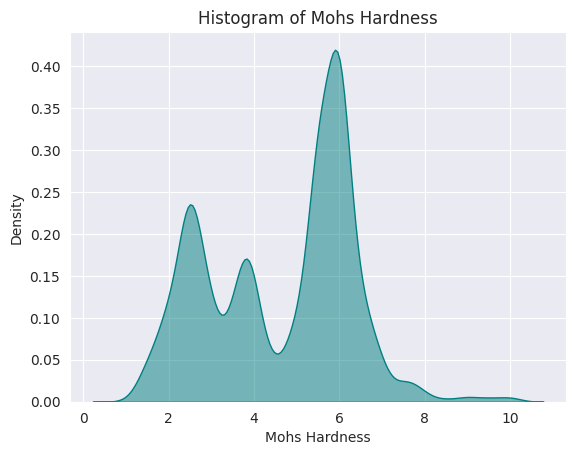

In [20]:
sns.kdeplot(data=combined_train_df, x="Hardness", fill=True, alpha=0.5)
plt.xlabel("Mohs Hardness")
plt.title("Histogram of Mohs Hardness")
plt.show()

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [21]:
num_cols = combined_train_df.select_dtypes(include=np.number).columns.to_list()

In [22]:
corrmat = combined_train_df[num_cols].corr()

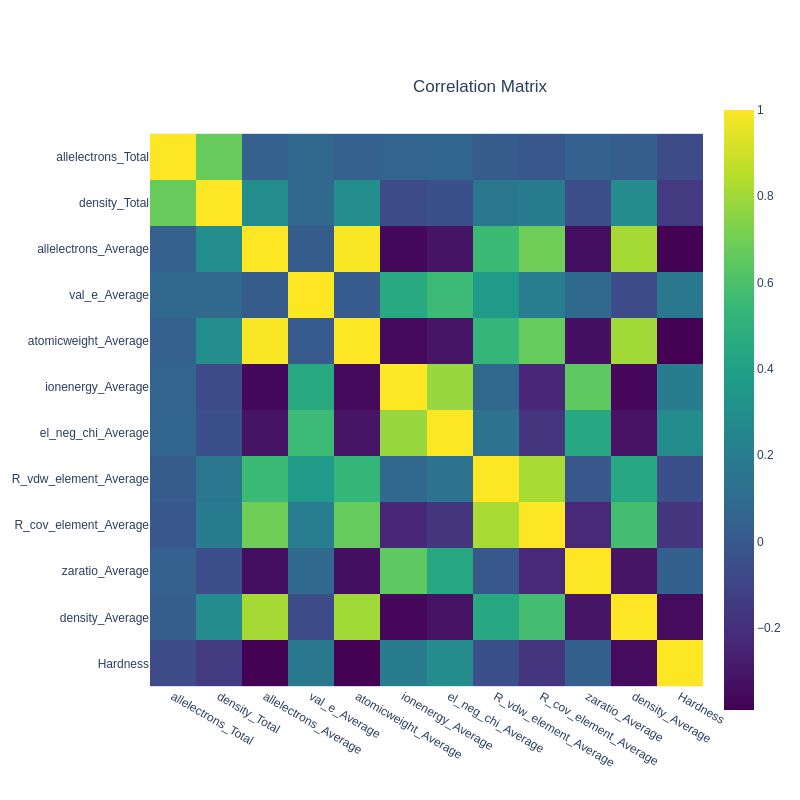

In [23]:
corr_matrix = combined_train_df[num_cols].corr()

fig = px.imshow(corr_matrix, color_continuous_scale='Viridis', title='Correlation Matrix')
fig.update_layout(width=800, height=800, title_x=0.6, title_y=0.9)

fig.show('png')

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Feature Engineering</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [25]:
def simple_fe(data):
    # Atomic weight and ionization energy ratio
    data['atomicweight_ionenergy_Ratio'] = data['atomicweight_Average'] / (data['ionenergy_Average'] + 0.0000001)
    
    # Normalized density with respect to the total number of electrons
    data['normalized_density'] = data['density_Total'] / (data['allelectrons_Total'] + 0.0000001)
    
    # Electronegativity and Van der Waals radius ratio
    data['el_neg_chi_R_vdw_Ratio'] = data['el_neg_chi_Average'] / (data['R_vdw_element_Average'] + 0.0000001)
    
    # Number of Electrons Based on Average Atomic Weight
    data['electrons_per_atomicweight'] = data['allelectrons_Average'] / (data['atomicweight_Average'] + 0.0000001)

    # Valence Electron Count
    data['specific_electron_count'] = data['allelectrons_Total'] / (data['atomicweight_Average'] + 0.0000001)
    
    return data

In [26]:
combined_train_df = simple_fe(combined_train_df)
test_df = simple_fe(test_df)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Fix Outliers</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

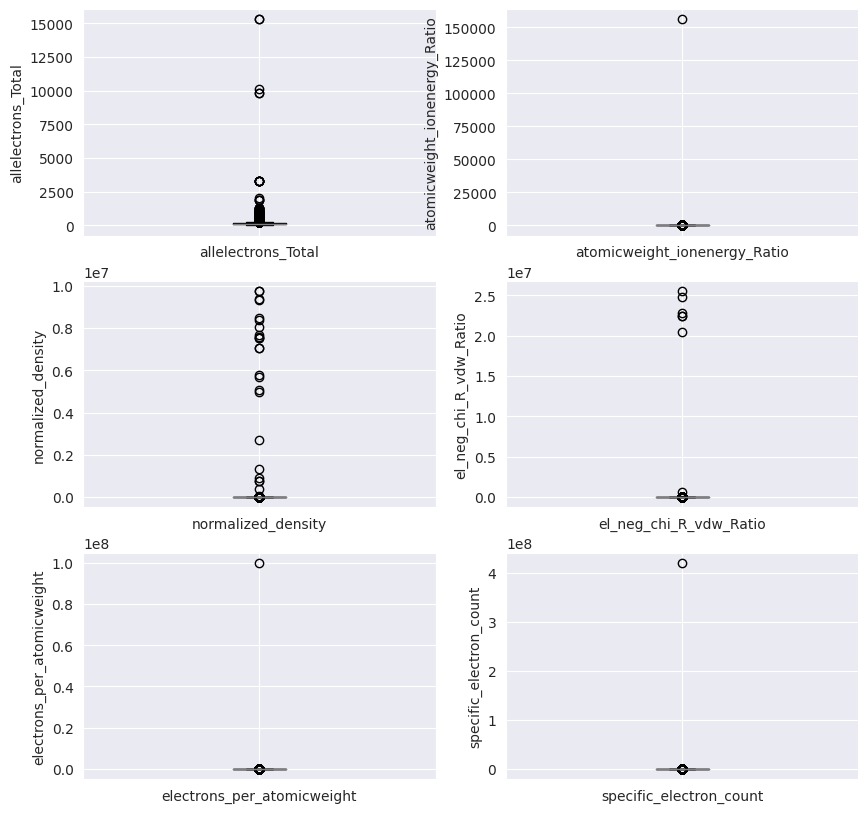

In [27]:
# Boxplots to visualize outliers
outlier_columns = [
    'allelectrons_Total', 'atomicweight_ionenergy_Ratio', 'normalized_density', 
    'el_neg_chi_R_vdw_Ratio', 'electrons_per_atomicweight', 'specific_electron_count'
]

def plot_outliers(outlier_columns):
    plt.figure(figsize=(10,10))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(3, 2, idx+1)
        fig = combined_train_df.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

In [28]:
def fix_outlier(column, df):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    Lower_fence = df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = df[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return df[df[column] <= Upper_fence]

In [29]:
for column in outlier_columns:
    combined_train_df = fix_outlier(column, combined_train_df)

allelectrons_Total outliers are values < -142.0 or > 348.0
atomicweight_ionenergy_Ratio outliers are values < -6.185353529214806 or > 12.493903307803878
normalized_density outliers are values < -0.16614142715668004 or > 0.40339893195579823
el_neg_chi_R_vdw_Ratio outliers are values < 0.7806577493937448 or > 2.3337890246194246
electrons_per_atomicweight outliers are values < 0.33307076302666105 or > 0.6161795456562028
specific_electron_count outliers are values < -6.427148190629786 or > 13.425557192859888


In [30]:
combined_train_df.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,atomicweight_ionenergy_Ratio,normalized_density,el_neg_chi_R_vdw_Ratio,electrons_per_atomicweight,specific_electron_count
count,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00,9937.00
mean,106.39,12.51,16.22,4.57,35.44,11.02,2.63,1.73,0.94,0.49,2.03,4.74,3.33,0.12,1.52,0.47,3.66
std,58.26,8.62,8.94,0.64,22.01,1.27,0.31,0.17,0.17,0.06,1.79,1.66,2.33,0.06,0.24,0.05,2.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,66.00,7.44,10.00,4.17,20.30,10.63,2.54,1.67,0.86,0.48,0.82,3.30,1.82,0.08,1.44,0.45,2.06
50%,99.00,10.10,12.57,4.75,26.19,11.24,2.71,1.73,0.91,0.49,1.35,5.50,2.32,0.11,1.59,0.48,3.00
75%,126.00,15.55,21.00,4.80,47.32,11.69,2.81,1.79,0.98,0.50,2.63,6.00,4.33,0.16,1.67,0.49,4.90
max,348.00,100.14,51.00,6.00,127.04,15.25,3.44,2.25,1.55,0.83,10.97,10.00,12.48,0.40,2.28,0.61,13.36


<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Data Preprocessing Pipeline</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [31]:
X_train = combined_train_df.drop(columns=['Hardness'], axis=1)
y_train = combined_train_df['Hardness']

In [32]:
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

In [33]:
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

In [34]:
num_pipeline.fit(X_train)

Pipeline(steps=[('scaler', MinMaxScaler())])

In [35]:
X_train = num_pipeline.transform(X_train)
X_test_ = num_pipeline.transform(test_df)

assert X_train.shape[1] == X_test_.shape[1]

In [36]:
X_train.shape, y_train.shape

((9937, 16), (9937,))

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from lightgbm import LGBMRegressor

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [38]:
lgbm_reg = LGBMRegressor(n_jobs=-1)

In [39]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_median_absolute_error', cv=cv)

# Print the median absolute error score across folds
print('Median Absolute Error:', scores.mean()) 

Median Absolute Error: -0.6447925896933233


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="grid_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Grid Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [40]:
from sklearn import model_selection 

In [41]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0]
}

In [42]:
model = model_selection.GridSearchCV(
    estimator = lgbm_reg,
    param_grid = param_grid,
    scoring = 'neg_median_absolute_error',
    verbose = 1,
    cv = cv
)

In [43]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best score: -0.6300459140798089
Best parameters set:
	colsample_bytree: 0.6
	learning_rate: 0.1
	max_depth: 25


<a id="randomized_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.2. Randomized Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [44]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 15, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    'num_leaves': [20, 31, 63, 127],
    'subsample': [0.5, 0.8, 0.9, 1.0],
}

In [45]:
model = model_selection.RandomizedSearchCV(
    estimator = lgbm_reg, 
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'neg_median_absolute_error',
    verbose = 1, 
    cv = cv
)

In [46]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score: -0.6314990296081099
Best parameters set:
	colsample_bytree: 0.9
	learning_rate: 0.1
	max_depth: 25
	num_leaves: 127
	subsample: 0.5


<a id="bayes_optimization"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.3. Bayesian Optimization with Gaussian Process</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [47]:
import warnings
import time
warnings.filterwarnings("ignore")

import optuna
import lightgbm as lgb
from bayes_opt import BayesianOptimization

from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split

In [48]:
X = X_train.copy()
y = y_train.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state = 42)

In [49]:
def objective_lgb(trial):
    params = {
        'objective': trial.suggest_categorical('objective', ['mae']),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        "extra_trees" : trial.suggest_categorical('extra_trees', [True]),
    }

    model_lgb = LGBMRegressor(**params)
    
    model_lgb.fit(X_train, y_train)

    y_pred = model_lgb.predict(X_test)
    
    return median_absolute_error(y_test, y_pred)


In [50]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=100,show_progress_bar=True)

[I 2023-11-30 02:58:55,994] A new study created in memory with name: no-name-c7abeb34-3dae-48eb-aedc-997a4422de9f


  0%|          | 0/100 [00:00<?, ?it/s]

In [51]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'mae', 'max_depth': 17, 'num_leaves': 79, 'min_child_samples': 19, 'learning_rate': 0.026031796650176613, 'n_estimators': 3687, 'min_child_weight': 9, 'subsample': 0.7654753397435305, 'colsample_bytree': 0.5486283321524671, 'reg_alpha': 0.3004805843815071, 'reg_lambda': 0.3649876343732527, 'random_state': 42, 'extra_trees': True}


In [52]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

lgb = LGBMRegressor(**study_lgb.best_params)
scores = cross_val_score(lgb, X, y, scoring='neg_median_absolute_error', cv=cv)

# Print the median absolute error score across folds
print('Median Absolute Error:', scores.mean()) 

Median Absolute Error: -0.5245822476241682


<a id="pred_test_data"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Make Prediction on Test Data</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [53]:
lgb.fit(X, y)

LGBMRegressor(colsample_bytree=0.5486283321524671, extra_trees=True,
              learning_rate=0.026031796650176613, max_depth=17,
              min_child_samples=19, min_child_weight=9, n_estimators=3687,
              num_leaves=79, objective='mae', random_state=42,
              reg_alpha=0.3004805843815071, reg_lambda=0.3649876343732527,
              subsample=0.7654753397435305)

In [54]:
preds = lgb.predict(X_test_)
preds[:10]

array([2.45997627, 2.57704954, 5.96484112, 4.65415592, 4.87668265,
       4.95827951, 3.49888458, 5.59222709, 2.64715632, 4.89999294])

In [55]:
submission_df.head()

,id,Hardness
0,10407,4.65
1,10408,4.65
2,10409,4.65
3,10410,4.65
4,10411,4.65


In [56]:
submission_df['Hardness'] = preds

submission_df.to_csv('submission.csv', index=None)

In [57]:
submission_df.head()

,id,Hardness
0,10407,2.46
1,10408,2.58
2,10409,5.96
3,10410,4.65
4,10411,4.88
